In [1]:
#Jason Ton jht5qfn
#Sources and References:
#KMeans implemented for my Foundations of Data Analysis Class
#UPLOAD 2D data, cardiac, testX,testY,trainX,trainY FILE TO WORKSPACE FIRST

1) v = [15,34,18,22] w = [1,3,2,7]

a) Find magnitudes of the vectors by squaring all the elements adding them and then finding the square root. (Use norm equation)
||v|| = sqrt(15^2 + 34^2 + 18^2 + 22^2)
||v|| = 46.78

||w|| = sqrt(1^2 + 3^2 + 2^ 2+ 7^2)
||w|| = 7.937

b) Simply perform the dot product formula  (v, w)

v * w

= [15,34,18,22] * [18,2,22,7]

[15 x 1 + 34 x 3 + 18 x 2 + 22 x 7]

= crossproduct of v and w = 307

c) Find difference of sums, square them, and them and then sqrt

[15,34,18,22] - [1,3,2,7] ->

sqrt( (15-1)^2 + (34-3)^2 + (18-2)^2 + (22-7)^2)

difference = 40.47

d) use the projection formula ->

z = (x/(||x||)^2) * cross product 

= (([1,3,2,7])/46.78) * 307

= [4.87,14.61,9.75,34.11]


2) 

a)
all 10 packets
N= 100,  n = 50, x = 40, k = 90
USE HYPERGEOMETRIC FORMULA

((90 choose 40) (10 choose 10))/(100 choose 50) =

= 0.0006 (rounded)
 
b)
 P(X>=5) = 1 - (P(0) + P(1)+P(2)+P(3)+P(4))

 P(X > = 5 ) = 1 - ((90 choose 50) (10 choose 0))/(100 choose 50) + ((90 choose 49) (10 choose 1))/(100 choose 50) ... ((90 choose 46) (10 choose 4))/(100 choose 50).

 P(X>=5) = 0.63



 
    3a)                  hxofHT
                     0      1
          male  0: | 144 | 76 | =220
         female 1: | 249 | 89 | =338
                    =393 = 165

3b) Use hypergeometric equation again with the values found from the table above

N=558, n = 338, k = 393, x = 249

Solution = ((393 choose 249) * (165 choose 89))/(558 choose 338)

solution = 0.0088

for the actual code look below

3c) Null hypothesis would be that "Men and women don't have a difference in their chance of getting hyper tension

3d) 0.0240 Calculated below. If we are looking for p<=0.05. Our p value is less than 0.05 therefore we can reject the null hypothesis.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import random
from math import comb


# Problem 3 

#a)
df = pd.read_csv(r'cardiac.csv')




men = 0
women = 0
m_hyper = 0
m_nohyper = 0
w_hyper = 0
w_nohyper = 0

for i in range(len(df)):
  if df.iloc[i]['gender'] == 0:
    men+=1
    if df.iloc[i]['hxofHT'] == 0:
      m_hyper+=1
    else:
      m_nohyper +=1
  if df.iloc[i]['gender'] == 1:
    women+=1
    if df.iloc[i]['hxofHT'] == 0:
      w_hyper+=1
    else:
      w_nohyper +=1


P_male = men/ len(df)
P_female = women/ len(df)

P_m_hyper = m_hyper/len(df)
P_w_hyper = w_hyper/len(df)
P_m_nohyper = m_nohyper/len(df)
P_w_nohyper = w_nohyper/len(df)

print("Total sample size: " + str(len(df)))
print("------------------------------------------------------------")
print("Probability of male: " +  str(P_male) + " (" + str(men) + ")" )
print("Probability of female: " +  str(P_female) + " (" + str(women) + ")" )
print("------------------------------------------------------------")
print("Probability of hyperttension: " +  str(P_m_hyper +P_w_hyper) + " (" + str(w_hyper+m_hyper) + ")" )
print("Probability of no hypertension: " +  str(P_m_nohyper +P_w_nohyper) + " (" + str(w_nohyper+m_nohyper) + ")" )
print("------------------------------------------------------------")
print("Probability of being man and having hyperttension: " +  str(P_m_hyper) + " (" + str(m_hyper) + ")" )
print("Probability of being man and not having hyperttension: " +  str(P_m_nohyper) + " (" + str(m_nohyper) + ")" )
print("------------------------------------------------------------")
print("Probability of being woman and having hyperttension: " +  str(P_w_hyper) + " (" + str(w_hyper) + ")" )
print("Probability of being woman and not having hyperttension: " +  str(P_w_nohyper) + " (" + str(w_nohyper) + ")" )

print("------------------------------------------------------------")

# 3B ) Function to get exact table 


def probability(N,n,k,x):

  defect=comb(k,x)
  complement=comb(N-k,n-x)
  deno = comb(N,n)

  return((complement*defect)/deno)

#3B running on our table
print("3b: " + str(probability(558,338,393,249)))


#3D
temp = 0
for i in range(249, 338):
  temp+= probability(558,338,393,i)

print("3d: " + str(temp))


Total sample size: 558
------------------------------------------------------------
Probability of male: 0.3942652329749104 (220)
Probability of female: 0.6057347670250897 (338)
------------------------------------------------------------
Probability of hyperttension: 0.7043010752688172 (393)
Probability of no hypertension: 0.2956989247311828 (165)
------------------------------------------------------------
Probability of being man and having hyperttension: 0.25806451612903225 (144)
Probability of being man and not having hyperttension: 0.13620071684587814 (76)
------------------------------------------------------------
Probability of being woman and having hyperttension: 0.44623655913978494 (249)
Probability of being woman and not having hyperttension: 0.15949820788530467 (89)
------------------------------------------------------------
3b: 0.008846092806850215
3d: 0.024039690892811647


(99, 2)
Graphs Below


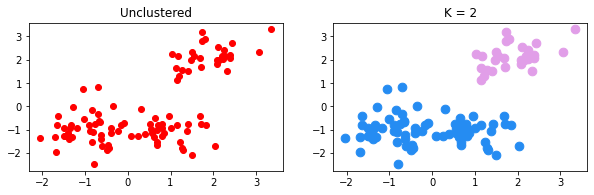

In [ ]:
#4) KMEANS

data = pd.read_csv("2D_data.txt" )

#Data cleanup


extra = list(data.columns.values)
data.append(extra)
valuesdict = {'X': [],
        'Y': []}
values = pd.DataFrame(valuesdict)
X = []
Y = []

for i in range(len(data)):
  x, y = (str(data.iloc[i][0])).split()
  x = float(x)
  y =float(y)

  df2 = {'X': (x), 'Y': (y)}

  values = values.append(df2, ignore_index = True)

#SHOW UNCLUSTERED


plt.rcParams["figure.figsize"] = (10,6) 



maxX = max(values['X'])
minX = min(values['X'])
maxY = max(values['Y'])
minY = min(values['Y'])
#INITIALIZE POINTS


print(values.shape)

def initialize(k,min,max, dim,data):
  centroids = []
  for i in range(k):
    temp = []
    for j in range(dim):
      point = random.randint(min, max-1)
      centroid = data.loc[point, :].values.tolist()
    
    centroids.append(centroid)

  return centroids;

def mean(a):
    return sum(a) / len(a)



from random import randint
colors = []

for i in range(50):
    colors.append('#%06X' % randint(0, 0xFFFFFF))


def Kmeans(K,data,subplotx,subploty,color,size):
  dict = {}

  converge = False
  centroids = initialize(K,0,len(data),len(data.axes[1]),data)
  

  prevdict = {}

  if K==0:

      plt.subplot(2,subplotx,subploty)
      plt.scatter(data['X'],data['Y'],c='red')
      plt.gca().title.set_text("Unclustered")
      return 0
  while(converge == False):
    distance_score=0

    for i in range(len(centroids)):
      if centroids[i] ==[]:
        centroid = []
        for j in range(len(data.axes[1])):
          centroid.append(random.uniform(minX,maxX))
        centroids[i] = centroid

    centdict = {}

    for i in range(len(centroids)):
      centdict[i] = []


    for i in range(len(data)):
      distances = []
      point = data.loc[i, :].values.tolist()

      for j in centroids:

        distances.append(math.dist(point,j))

      minimum = min(distances)

      centdict[distances.index(minimum)].append(point)
    
    
   
    for i in centdict.keys():
      
      temp = list(map(mean, zip(*centdict[i])))
      
      centroids[i] = temp
  
    if(prevdict != centdict):
      prevdict = centdict
    else:
      converge = True
      track =1
      if(size == False):
        for i in centdict.keys():
              for j in centdict[i]:
                distance_score+=math.dist(centroids[i],j)

        for i in centroids:

          DF = pd.DataFrame(i)
          trainNPX = DF.to_numpy()
          if(len(trainNPX)==0):
             x=1+1
          else:
            centroidimage = trainNPX.reshape(28, 28)
            plt.subplot(2,subplotx,track)
            plt.imshow(centroidimage)
            plt.gca().title.set_text("K = " + str(K) )
            track+=1

      else:
          for i in centdict.keys():
              for j in centdict[i]:
                plt.subplot(2,subplotx,subploty)
                plt.scatter(j[0],j[1],c = colors[i], s = 75)
                distance_score+=math.dist(centroids[i],j)
                plt.gca().title.set_text("K = " + str(K))



  return distance_score /len(data)







#plot unscattered

#plot two centroids
Kmeans(0,values,2,1,1,True)
Kmeans(2,values,2,2,1,True)


print("Graphs Below")


First 10 runs of k =3


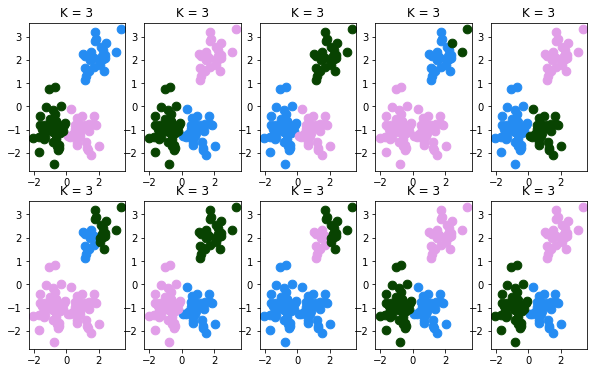

In [ ]:
k3distancescores = [0]
for i in range(1,11):
  k3distancescores.append(Kmeans(3,values,5,i,i,True))
print("First 10 runs of k =3")

Second 10 runs of K =3


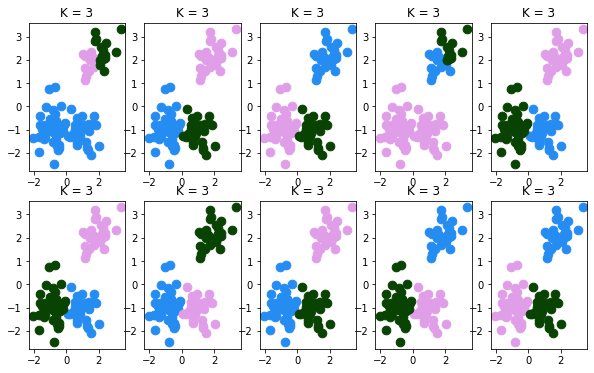

In [ ]:
#Run 20 iterations on k=3

for i in range(1,11):
  k3distancescores.append(Kmeans(3,values,5,i,i,True))
print("Second 10 runs of K =3")




  
    


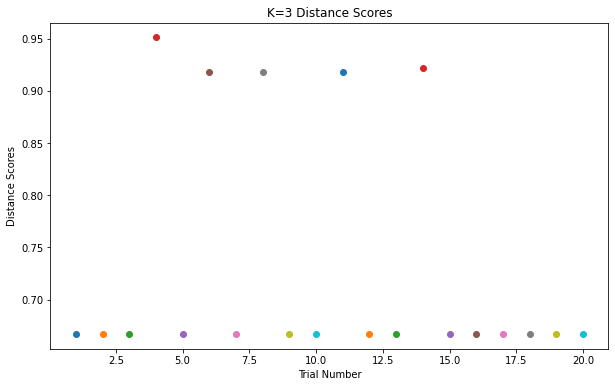

In [ ]:
#plot distance scores vs trials

for i in range(1,21):
  plt.ylabel("Distance Scores")
  
  plt.xlabel("Trial Number")
  plt.title("K=3 Distance Scores")
  plt.scatter(i,k3distancescores[i])
#Distance score is sum of distances/number of points



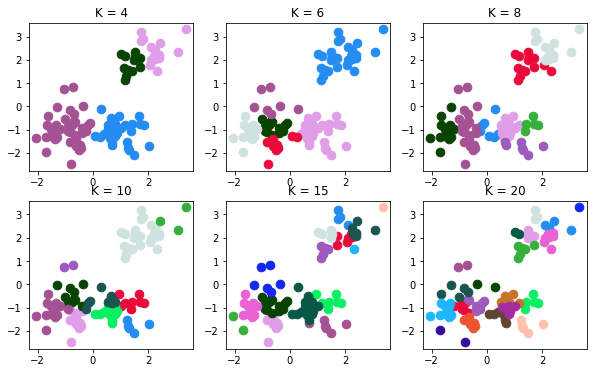

In [ ]:
distance_scores_part2 = []
arr = [4,6,8,10,15,20]

distance_scores_part2.append(Kmeans(4,values,3,1,"green",True))
distance_scores_part2.append(Kmeans(6,values,3,2,"orange",True))
distance_scores_part2.append(Kmeans(8,values,3,3,"yellow",True))
distance_scores_part2.append(Kmeans(10,values,3,4,"blue",True))
distance_scores_part2.append(Kmeans(15,values,3,5,"black",True))
distance_scores_part2.append(Kmeans(20,values,3,6,"purple",True))



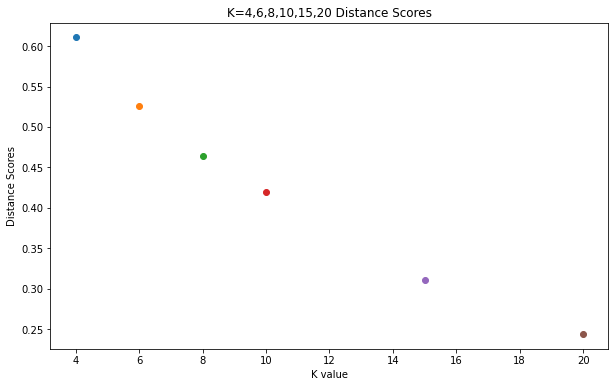

In [ ]:
for i in range(len(distance_scores_part2)):
  plt.ylabel("Distance Scores")
  
  plt.xlabel("K value")
  plt.title("K=4,6,8,10,15,20 Distance Scores")
  plt.scatter(arr[i],distance_scores_part2[i])

6.4452387812502625

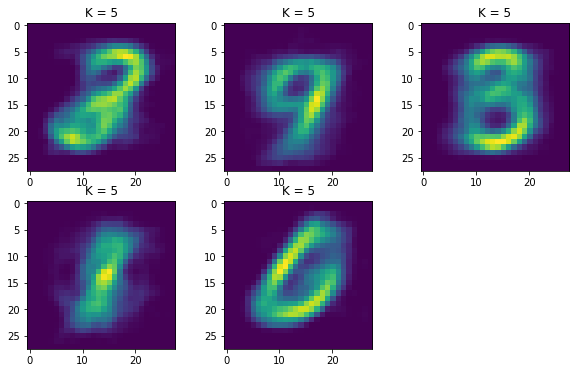

In [ ]:
import numpy
import sys


trainDFX = pd.read_csv("trainX.txt" )

testDFX = pd.read_csv("testX.txt" )


trainNPX = trainDFX.to_numpy()

testNPX = trainDFX.to_numpy()



#KMEANS K = 5 ON TRAINING DATA

Kmeans(5,trainDFX,3,2,"green",False)




6.009670315420015

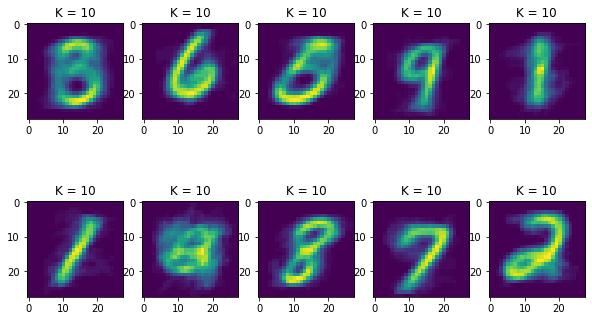

In [ ]:
#KMEANS K = 10 ON TRAINING DATA

Kmeans(10,trainDFX,5,2,"green",False)

5.849399838285852

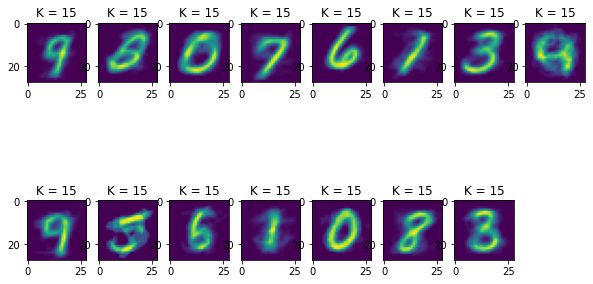

In [ ]:
#KMEANS K = 15 ON TRAINING DATA
Kmeans(15,trainDFX,8,3,"green",False)

#Kmeans(30,trainDFX,15,3,"green",False)

6.382163100578233

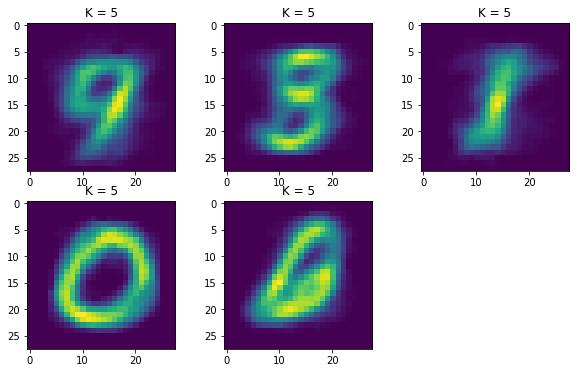

In [ ]:
#KMEANS K = 5 ON TESTING DATA
Kmeans(5,testDFX,3,2,"green",False)

5.92986618038575

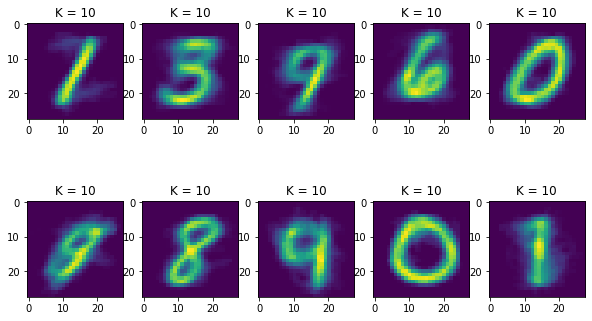

In [ ]:
#KMEANS K = 10 ON TESTING DATA
Kmeans(10,testDFX,5,2,"green",False)

5.716604511362612

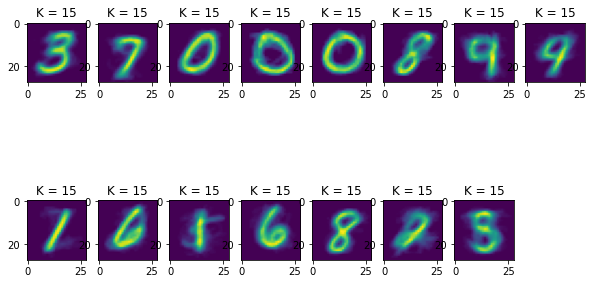

In [ ]:
#KMEANS K = 15 ON TESTING DATA
Kmeans(15,testDFX,8,2,"green",False)

4. Reflecting and answering questions: The clusters do look like digits if the K value is high enough. 5,10 were inconsistenet and looked alright sometimes however most of the time It was difficult to identify the digit. When I got to 15 I was getting most of the digits most of the time however depending on the initalization i would sometimes miss the digits, So i think we should stick to something in the 20-30 range would get all true digits without overfitting.


Chat GPT extra credit prompts:

1.
  a)
  In a hypothetical space of four dimensions, there are two distinct sets of numerical coordinates representing vectors. Assuming a process of magnitude calculation using respective coordinate values, what is the eventual resolution of the final results for both vectors? Provide the magnitude  for these two vectors in this hypothetical four dimension space

in this space the two vectors are v[x,y,w,z] = [9+6, 3*4+20, (3^2)*2, 21-8+9], w[x,y,w,z]  = [7^0, 33/11, 2222/2222 +1, 77/11
]

b)

  Find the sum of the products of the corresponding components and return the scalar

v = [15, 32, 18, 22] and w = [1, 3, 2, 7]

c)
using the euclidean distance formula on the two vectors find the distance between the two as points

v = [15, 32, 18, 22] and w = [1, 3, 2, 7]

d) find the projection of vector v onto vector w 

v[x,y,w,z] = [9+6, 3*4+20, (3^2)*2, 21-8+9], w[x,y,w,z]  = [7^0, 33/11, 2222/2222 +1, 77/11
]

2.
There are 600/6 packets sent to the server, with a tenth of them from hackers, 45 from legitimate traffic and 45 from other legitimate traffic. if we choose half of the packets randomly from the 1000/10 packets whats the probability that we get all of the packets that are not from reliable sources and from potentially malicious sources

3a)
(a) draw the 2x2 table where the top left cell represents the men who have hyper tension, the top right cell represents the men who dont have hyper tensions and vice versa with the women for the bottom two cells. where the sample size is 558 and the amount of women who have hyper tension is 249 and the number of men who have hypertension is 144 and the total number of women is 338

b)
Write a Python function to compute the probability that you get the statistics from the previous table using no built in packages and without creating any functions

c)
find the opposite of the "valid fact" that is stated in the beginning of testing a claim. In this case it would be that the gender that is opposite of men has a opposite of lower chance of getting hypertension
d)
using a from scratch python implementation of the hypergeometric distribution, perform the Fisher exact test to get a p value
for the hypothesis that women have hypertension more frequently than men. Can you
“not accept the null hypothesis” with the threshold p ≤ 0.05?


d)
using a from scratch python implementation of the hypergeometric distribution, perform the Fisher exact test to get a p value
for the hypothesis that women have hypertension more frequently than men. Can you
“not accept the null hypothesis” with the threshold p ≤ 0.05?

